In [1]:
import sys, os
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

home_dir = '/home/mtr22/dvorak/net/pulsar/home/koes/mtr22'
ligan_dir = home_dir + '/gan'
work_dir = home_dir + '/gan/test_atom_fitting/benzene'

sys.path.append(ligan_dir)
from params import ParamSpace
from results import add_group_column, plot_strips, plot_corr

In [2]:
fit_name = '{atom_init}_{beam_size}_{interm_iters}_{final_iters}'
fit_params = ParamSpace(format=fit_name.format)
fit_params['atom_init'] = ['n', 'c']
fit_params['beam_size'] = [1, 3, 5]
fit_params['interm_iters'] = [0, 1, 10]
fit_params['final_iters'] = [0, 1, 10]
len(fit_params)

54

In [3]:
dfs = []
for fit_param in fit_params:
    fit_name = fit_param.name
    metrics_file = '{}/{}.gen_metrics'.format(work_dir, fit_name)
    try:
        df = pd.read_csv(metrics_file, sep=' ')
        df['fit_name'] = fit_name
        for p, v in fit_param.items():
            df[p] = v
        dfs.append(df)
    except FileNotFoundError:
        print('FileNotFound: {}'.format(metrics_file), file=sys.stderr)
    
df = pd.concat(dfs)

# remove columns
for c in df:
    if '_gen' in c:
        del df[c]
        
# add columns
df['n_atoms_diff'] = df['lig_fit_n_atoms'] - 6

def aggregate(x):
    if x.name == 'sample_idx':
        return x.nunique()
    elif is_numeric_dtype(x):
        return x.mean()
    else:
        return x.iloc[0]

agg_df = df.groupby('fit_name').agg(aggregate)
agg_df = agg_df.rename(columns={'sample_idx': 'n_samples'})

print(df.columns)

Index(['lig_name', 'sample_idx', 'lig_norm', 'lig_var', 'lig_fit_loss',
       'lig_fit_n_atoms', 'lig_fit_radius', 'lig_fit_time', 'fit_name',
       'atom_init', 'beam_size', 'interm_iters', 'final_iters',
       'n_atoms_diff'],
      dtype='object')


FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/benzene/c_5_10_1.gen_metrics
FileNotFound: /home/mtr22/dvorak/net/pulsar/home/koes/mtr22/gan/test_atom_fitting/benzene/c_5_10_10.gen_metrics


In [4]:
agg_df.sort_values(['lig_fit_n_atoms', 'lig_fit_time'])

,lig_name,n_samples,lig_norm,lig_var,lig_fit_loss,lig_fit_n_atoms,lig_fit_radius,lig_fit_time,atom_init,beam_size,interm_iters,final_iters,n_atoms_diff
fit_name,,,,,,,,,,,,,
n_1_1_0,benzene,10,24.206453,42.543698,3.068366,6.0,1.688083,3.868152,n,1,1,0,0.0
n_1_1_1,benzene,10,24.206328,49.569122,1.958981,6.0,1.670009,4.130402,n,1,1,1,0.0
n_1_1_10,benzene,10,24.206310,51.738211,0.755477,6.0,1.554088,6.484818,n,1,1,10,0.0
c_1_0_0,benzene,10,24.206430,47.522156,25.558044,6.0,1.937350,7.104946,c,1,0,0,0.0
c_1_1_0,benzene,10,24.206315,44.321092,5.098544,6.0,1.738871,8.551926,c,1,1,0,0.0
c_1_1_1,benzene,10,24.206826,46.358858,3.369020,6.0,1.734454,8.835061,c,1,1,1,0.0
c_1_1_10,benzene,10,24.206311,51.176401,0.682955,6.0,1.547249,11.472824,c,1,1,10,0.0
n_1_10_0,benzene,10,24.206199,47.847966,0.078655,6.0,1.458277,11.978515,n,1,10,0,0.0
n_1_10_1,benzene,10,24.206509,47.845634,0.078667,6.0,1.453075,12.318027,n,1,10,1,0.0


In [5]:
sns.set_context('notebook')
sns.set_style('white')

x = ['atom_init', 'beam_size', 'interm_iters', 'final_iters']
y = ['lig_fit_loss', 'n_atoms_diff', 'lig_fit_time']
    
for col in x:
    add_group_column(df, [c for c in x if c != col])
    
df['atom_init_idx'] = df['atom_init'].apply(lambda x: 'ncd'.index(x))
df.sort_values(['atom_init_idx', 'beam_size', 'interm_iters', 'final_iters'], inplace=True)

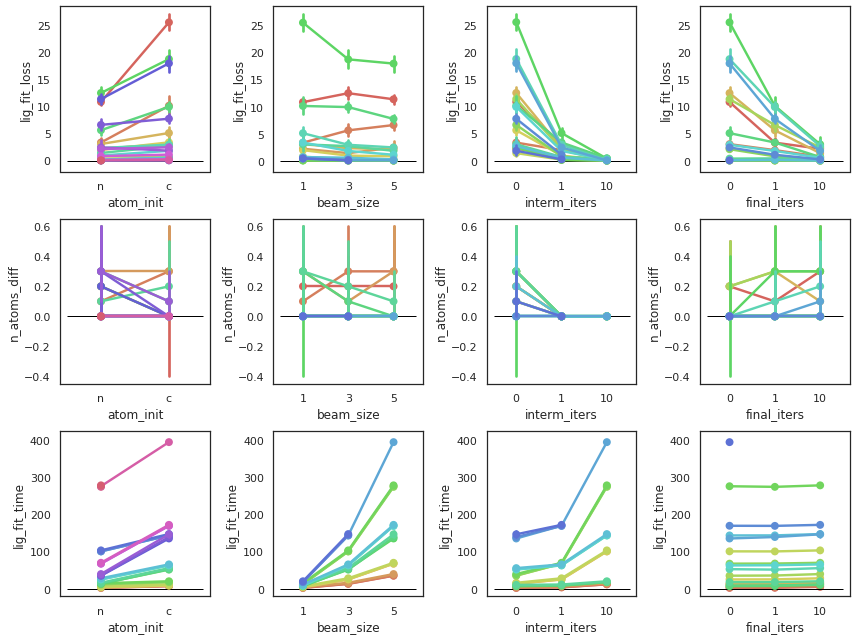

In [6]:
%matplotlib inline
sns.set_palette('hls', n_colors=27, desat=0.9)

plot_strips('benzene_strips_grouped.png', df, x, y, height=3, width=3, hue=None, grouped=True,
            point=True,  point_kws=dict(alpha=0.0,  dodge=False, scale=0.9),
            strip=False, strip_kws=dict(alpha=0.25, dodge=False, jitter=True, marker='.', size=10))
plt.show()

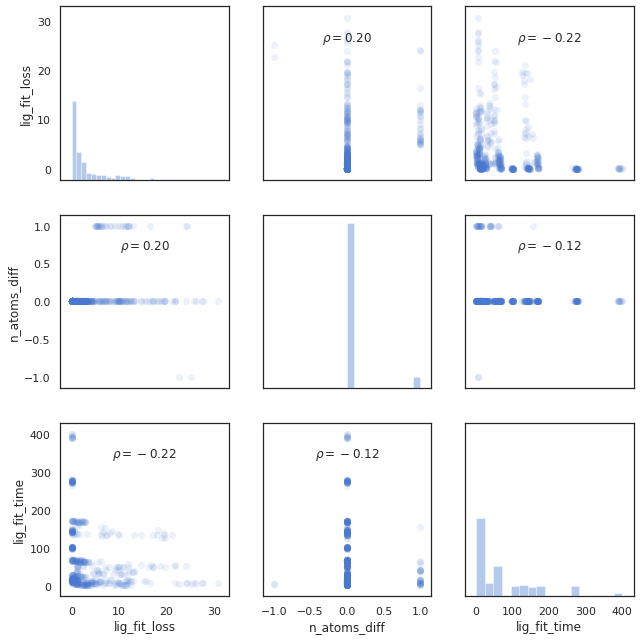

In [8]:
sns.set_palette('muted')

plot_corr('benzene_corr.png', df, y, y, height=3, width=3,
          scatter_kws=dict(alpha=0.1, s=50, linewidth=0),
          dist_kws=dict(kde=False), despine=False)
plt.show()